In [26]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
from xml.etree import ElementTree as ET
import os
import torch
import cv2

In [39]:
datadir = '/Users/tiendzung/Project/facial_landmarks-wandb/data/ibug_300W_large_face_landmark_dataset'
xml_path = os.path.join(datadir, 'labels_ibug_300W.xml')
root = ET.parse(xml_path).getroot()
images = root.find('images')

In [45]:
img_name = 'helen/testset/307494478_1.jpg'
landmark = []
bbox = []

In [67]:
for image in images.findall('image'):
    if image.attrib['file'] == img_name:
        # print(image.attrib['file'])
        for box in image.iter('box'):
            # print(box.attrib)
            bbox = box.attrib
            landmark = np.array([
                [float(part.attrib['x']), float(part.attrib['y'])] for part in box.iter('part')
            ])

for k, v in bbox.items():
    bbox[k] = float(v)
    
print(landmark.shape)
landmark = np.append(landmark, [[bbox['left'], bbox['top']]], axis = 0)
landmark = np.append(landmark, [[bbox['left'] + bbox['width'], bbox['top'] ]], axis = 0)
print(landmark.shape)
print(landmark)

(68, 2)
(70, 2)
[[388. 452.]
 [377. 531.]
 [376. 609.]
 [377. 692.]
 [391. 762.]
 [426. 817.]
 [473. 860.]
 [526. 894.]
 [586. 918.]
 [641. 914.]
 [699. 889.]
 [748. 854.]
 [787. 807.]
 [814. 757.]
 [831. 707.]
 [843. 651.]
 [859. 601.]
 [464. 457.]
 [512. 442.]
 [564. 444.]
 [614. 459.]
 [664. 486.]
 [747. 498.]
 [785. 496.]
 [817. 499.]
 [850. 515.]
 [868. 536.]
 [686. 557.]
 [681. 599.]
 [677. 638.]
 [674. 676.]
 [599. 691.]
 [625. 705.]
 [651. 716.]
 [672. 715.]
 [689. 713.]
 [512. 528.]
 [544. 517.]
 [577. 525.]
 [600. 555.]
 [569. 554.]
 [536. 547.]
 [724. 580.]
 [758. 563.]
 [788. 569.]
 [808. 587.]
 [784. 600.]
 [754. 596.]
 [533. 761.]
 [590. 755.]
 [621. 753.]
 [641. 762.]
 [664. 761.]
 [686. 775.]
 [704. 793.]
 [678. 806.]
 [652. 809.]
 [627. 811.]
 [604. 804.]
 [575. 791.]
 [551. 766.]
 [614. 774.]
 [636. 782.]
 [658. 782.]
 [690. 792.]
 [658. 782.]
 [636. 782.]
 [611. 780.]
 [394. 334.]
 [930. 334.]]


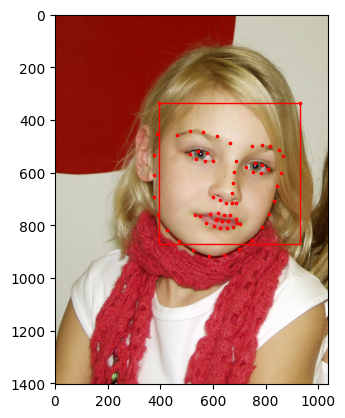

In [68]:
img = cv2.imread(os.path.join(datadir, img_name))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.scatter(landmark[:, 0], landmark[:, 1], s=10, marker='.', c='r')
rect = plt.Rectangle((bbox['left'], bbox['top']), bbox['width'], bbox['height'], fill=False, color='red')
plt.gca().add_patch(rect)